<a href="https://colab.research.google.com/github/nikhilrajput10052003-oss/Afforestation-CO2-Modeling-H.P/blob/main/afforestation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

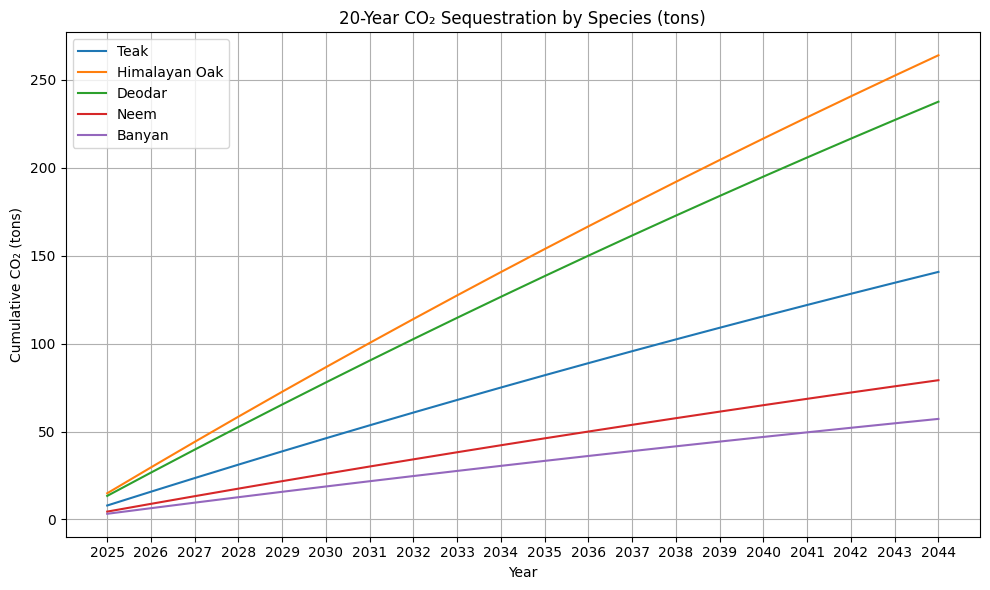

         Species  Surviving_Trees  Cumulative_CO2_tons  Economic_Value_USD
0         Banyan             44.0                 57.2              1430.0
1         Deodar            264.0                237.6              5940.0
2  Himalayan Oak            264.0                264.0              6600.0
3           Neem            132.0                 79.2              1980.0
4           Teak            176.0                140.8              3520.0


In [ ]:
# afforestation_model.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 1. Define species parameters
species_params = {
    'Teak':           {'count':200, 'annual_co2_kg':40, 'survival_rate':0.88, 'growth_mult':1.00},
    'Himalayan Oak':  {'count':300, 'annual_co2_kg':50, 'survival_rate':0.88, 'growth_mult':1.00},
    'Deodar':         {'count':300, 'annual_co2_kg':45, 'survival_rate':0.88, 'growth_mult':1.00},
    'Neem':           {'count':150, 'annual_co2_kg':30, 'survival_rate':0.88, 'growth_mult':1.00},
    'Banyan':         {'count':50,  'annual_co2_kg':65, 'survival_rate':0.88, 'growth_mult':1.00}
}

# 2. Simulation function with actual years (2025–2044)
def simulate(species_params, start_year=2025, years=20, carbon_price=25):
    rows = []
    for sp, p in species_params.items():
        for i in range(years):
            year = start_year + i
            surviving = p['count'] * (p['survival_rate'] ** ((i+1)/years))
            annual = surviving * p['annual_co2_kg'] * p['growth_mult']
            cum = annual * (i+1)
            value = cum/1000 * carbon_price
            rows.append({
                'Species': sp,
                'Year': year,
                'Surviving_Trees': surviving,
                'Annual_CO2_kg': annual,
                'Cumulative_CO2_kg': cum,
                'Cumulative_CO2_tons': cum/1000,
                'Economic_Value_USD': value
            })
    return pd.DataFrame(rows)

# 3. Run simulation
df = simulate(species_params, start_year=2025, years=20, carbon_price=25)

# 4. Save outputs
df.to_csv('afforestation_simulation.csv', index=False)

# 5. Plot results with integer year tick labels from 2025 to 2044
plt.figure(figsize=(10,6))
for sp in species_params:
    subset = df[df['Species']==sp]
    plt.plot(subset['Year'], subset['Cumulative_CO2_tons'], label=sp)

plt.title('20-Year CO₂ Sequestration by Species (tons)')
plt.xlabel('Year')
plt.ylabel('Cumulative CO₂ (tons)')
plt.legend()
plt.grid(True)

# Force integer ticks on the x-axis and range 2025–2044
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(2025, 2045, 1))))
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))

plt.tight_layout()
plt.savefig('co2_trend.png')
plt.show()

# 6. Summary table at final year (2044)
summary = df[df['Year']==2044].groupby('Species').agg({
    'Surviving_Trees':'sum',
    'Cumulative_CO2_tons':'sum',
    'Economic_Value_USD':'sum'
}).reset_index()
summary.to_csv('afforestation_summary.csv', index=False)

print(summary)
